## Importing Requirements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import xgboost as xgb
print(xgb.__version__)  # Should print the installed version of XGBoost

3.0.0


## Data Upload

In [4]:
df = pd.read_csv('/Users/anwinsanju/Code/Projects/Automating-Loan-Approval-Decision-using-Traditional-Machine-Learning-Techniques/data/loan_data.csv')

In [5]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Data Cleaning/Preparation

In [6]:
print('Shape Of Dataset :',df.shape)
df.describe()

Shape Of Dataset : (45000, 14)


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


### Handling Missing Values

In [7]:
print('Are there any missing values in the dataset? :',df.isnull().values.any())
df.isnull().sum()

Are there any missing values in the dataset? : False


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

### Handling Duplicate Values

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool

### Handling Outliers

In [9]:
q1=df['person_age'].quantile(0.25)
q3=df['person_age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['person_age']<lower_bound]|df[df['person_age']>upper_bound]
print('No of outliers present in attribute {person_age} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {person_age} : 2188
Outliers are :        person_age  person_gender  person_education  person_income  \
81          False          False             False          False   
183         False          False             False          False   
575         False          False             False          False   
747         False          False             False          False   
29120       False          False             False          False   
...           ...            ...               ...            ...   
44916       False          False             False          False   
44923       False          False             False          False   
44947       False          False             False          False   
44972       False          False             False          False   
44977       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
81              False       

In [10]:
q1=df['person_income'].quantile(0.25)
q3=df['person_income'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['person_income']<lower_bound]|df[df['person_income']>upper_bound]
print('No of outliers present in attribute {person_income} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {person_income} : 2039
Outliers are :        person_age  person_gender  person_education  person_income  \
15          False          False             False          False   
20          False          False             False          False   
33          False          False             False          False   
34          False          False             False          False   
42          False          False             False          False   
...           ...            ...               ...            ...   
44615       False          False             False          False   
44786       False          False             False          False   
44831       False          False             False          False   
44836       False          False             False          False   
44922       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
15              False    

In [11]:
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['loan_amnt']<lower_bound]|df[df['loan_amnt']>upper_bound]
print('No of outliers present in attribute {loan_amnt} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {loan_amnt} : 1778
Outliers are :        person_age  person_gender  person_education  person_income  \
0           False          False             False          False   
3           False          False             False          False   
4           False          False             False          False   
6           False          False             False          False   
7           False          False             False          False   
...           ...            ...               ...            ...   
44903       False          False             False          False   
44904       False          False             False          False   
44944       False          False             False          False   
44952       False          False             False          False   
44970       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0               False        

In [12]:
q1=df['loan_int_rate'].quantile(0.25)
q3=df['loan_int_rate'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['loan_int_rate']<lower_bound]|df[df['loan_int_rate']>upper_bound]
print('No of outliers present in attribute {loan_int_rate} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {loan_int_rate} : 77
Outliers are :        person_age  person_gender  person_education  person_income  \
523         False          False             False          False   
638         False          False             False          False   
1189        False          False             False          False   
1245        False          False             False          False   
1827        False          False             False          False   
...           ...            ...               ...            ...   
43568       False          False             False          False   
44119       False          False             False          False   
44636       False          False             False          False   
44762       False          False             False          False   
44965       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
523             False      

In [13]:
q1=df['loan_percent_income'].quantile(0.25)
q3=df['loan_percent_income'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['loan_percent_income']<lower_bound]|df[df['loan_percent_income']>upper_bound]
print('No of outliers present in attribute {loan_percent_income} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :\n',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {loan_percent_income} : 1259
Outliers are :
        person_age  person_gender  person_education  person_income  \
2           False          False             False          False   
11          False          False             False          False   
75          False          False             False          False   
160         False          False             False          False   
201         False          False             False          False   
...           ...            ...               ...            ...   
44978       False          False             False          False   
44986       False          False             False          False   
44991       False          False             False          False   
44994       False          False             False          False   
44998       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
2               Fa

In [14]:
df['credit_score']=df['credit_score'].astype('float')
q1=df['credit_score'].quantile(0.25)
q3=df['credit_score'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers = df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]
print('No of outliers present in attribute {credit_score} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :\n',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {credit_score} : 404
Outliers are :
        person_age person_gender person_education  person_income  \
353          23.0        female      High School        19859.0   
748          23.0        female      High School        74473.0   
764          25.0          male      High School        89914.0   
787          23.0          male      High School        27887.0   
798          22.0          male        Associate        27358.0   
...           ...           ...              ...            ...   
44618        28.0        female         Bachelor        59767.0   
44676        24.0        female        Associate        37217.0   
44754        25.0          male      High School        86195.0   
44954        25.0        female      High School        19819.0   
44992        23.0        female         Bachelor        40925.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
353                 0                   OWN  

In [15]:
q1=df['cb_person_cred_hist_length'].quantile(0.25)
q3=df['cb_person_cred_hist_length'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[df['cb_person_cred_hist_length']<lower_bound]|df[df['cb_person_cred_hist_length']>upper_bound]
print('No of outliers present in attribute {cb_person_cred_hist_length} :' ,len(outliers))
if len(outliers)>0:
  print('Outliers are :\n',outliers)
  df.drop(outliers.index,inplace=True)
  print('The following outliers have been dropped from the dataset')

No of outliers present in attribute {cb_person_cred_hist_length} : 996
Outliers are :
        person_age  person_gender  person_education  person_income  \
29218       False          False             False          False   
29255       False          False             False          False   
29260       False          False             False          False   
29261       False          False             False          False   
29262       False          False             False          False   
...           ...            ...               ...            ...   
44746       False          False             False          False   
44795       False          False             False          False   
44851       False          False             False          False   
44886       False          False             False          False   
44953       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
29218       

In [16]:
print('Shape of Dataset after removing outliers :',df.shape)

Shape of Dataset after removing outliers : (36259, 14)


### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['person_gender']=encoder.fit_transform(df['person_gender'])
df['person_home_ownership']=encoder.fit_transform(df['person_home_ownership'])
df['person_education']=encoder.fit_transform(df['person_education'])
df['loan_intent']=encoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file']=encoder.fit_transform(df['previous_loan_defaults_on_file'])

### Splitting Target Variable From Dataset

In [18]:
X=df.drop('loan_status',axis=1)
Y=df['loan_status']

### Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### Preprocessed Dataset

In [20]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
1,-1.384352,-1.100293,0.846464,-1.830630,-1.036563,0.170623,-1.521530,-0.879069,0.087935,-0.694723,-1.128605,-2.690440,0.954138
5,-1.384352,-1.100293,0.846464,-1.809437,-1.036563,0.170623,-1.207908,1.437030,-1.277977,0.842324,-1.128605,-2.102848,-1.048066
9,-1.384352,-1.100293,0.846464,-1.816153,-1.036563,0.170623,-1.396081,1.437030,1.317256,0.003935,-0.756762,0.163577,-1.048066
19,-0.625053,-1.100293,1.522126,-1.767242,-0.786764,-1.225589,-1.364719,-0.879069,0.036713,-0.135797,-1.128605,0.982009,-1.048066
23,-0.625053,-1.100293,-0.504860,-1.780452,-1.036563,0.170623,-1.416990,0.858006,-1.226755,-0.275528,-0.756762,-0.675840,0.954138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44993,0.134246,-1.100293,0.846464,-1.094753,-0.037368,0.868729,-0.685205,0.858006,1.689467,0.143666,-0.013075,-2.669455,-1.048066
44995,0.134246,0.908849,-1.180522,-0.700078,0.462230,0.868729,1.405609,0.278981,1.631416,2.519102,-0.756762,0.268504,-1.048066
44996,2.665242,-1.100293,-1.180522,-0.135293,3.210018,0.868729,0.151121,-0.300044,1.088466,0.143666,2.217984,-0.235146,-1.048066
44997,1.652844,0.908849,-1.180522,-0.415896,0.712029,0.868729,-1.151247,-1.458094,-0.294520,-1.113918,1.846141,0.751169,-1.048066


In [21]:
Y

1        0
5        1
9        1
19       1
23       0
        ..
44993    1
44995    1
44996    1
44997    1
44999    1
Name: loan_status, Length: 36259, dtype: int64

## Exploratory Data Analysis (EDA)/Data Visualisation

In [22]:
df['person_age'].describe()

count    36259.000000
mean        26.469594
std          3.951067
min         20.000000
25%         23.000000
50%         25.000000
75%         29.000000
max         39.000000
Name: person_age, dtype: float64

In [23]:
df['person_income'].describe()

count     36259.000000
mean      70070.896826
std       31568.204057
min        8000.000000
25%       46472.000000
50%       64798.000000
75%       88619.500000
max      166754.000000
Name: person_income, dtype: float64

In [24]:
df['loan_amnt'].describe()

count    36259.000000
mean      8277.214512
std       4782.892094
min        500.000000
25%       4800.000000
50%       7332.000000
75%      11043.000000
max      22500.000000
Name: loan_amnt, dtype: float64

In [25]:
df['loan_int_rate'].describe()

count    36259.000000
mean        10.882487
std          2.928487
min          5.420000
25%          8.490000
50%         11.010000
75%         12.920000
max         19.690000
Name: loan_int_rate, dtype: float64

In [26]:
df['loan_percent_income'].describe()

count    36259.000000
mean         0.129718
std          0.071567
min          0.010000
25%          0.070000
50%          0.120000
75%          0.180000
max          0.320000
Name: loan_percent_income, dtype: float64

In [27]:
df['credit_score'].describe()

count    36259.000000
mean       632.205190
std         47.652781
min        498.000000
25%        601.000000
50%        638.000000
75%        668.000000
max        762.000000
Name: credit_score, dtype: float64

### Univariate Analysis

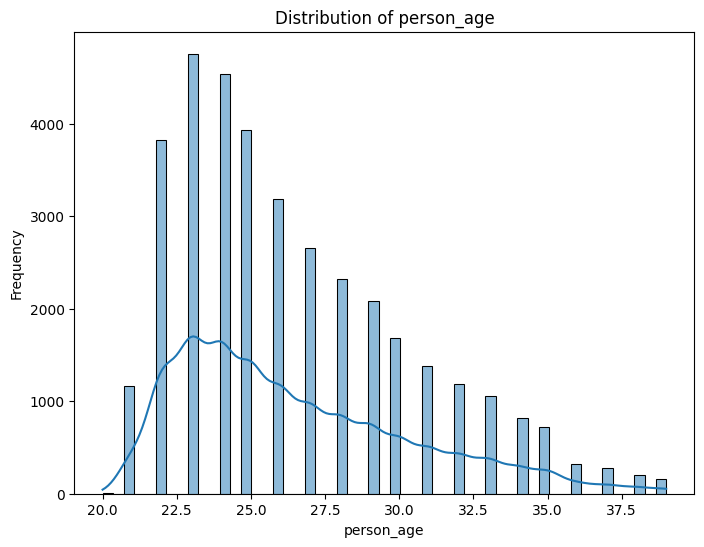

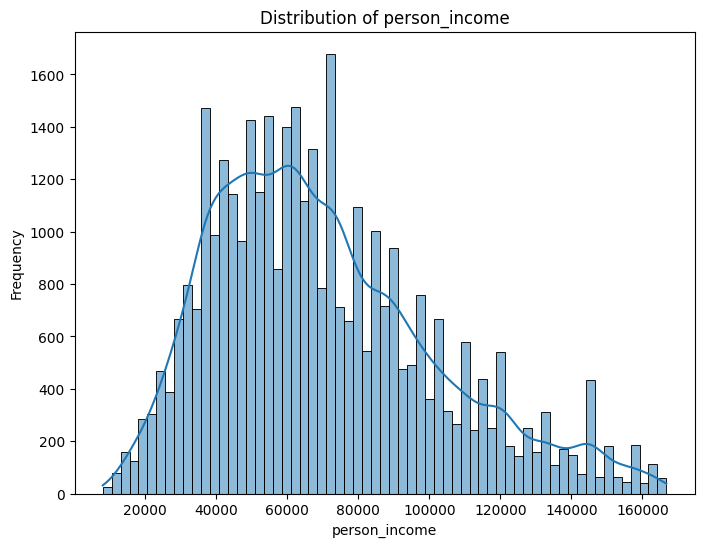

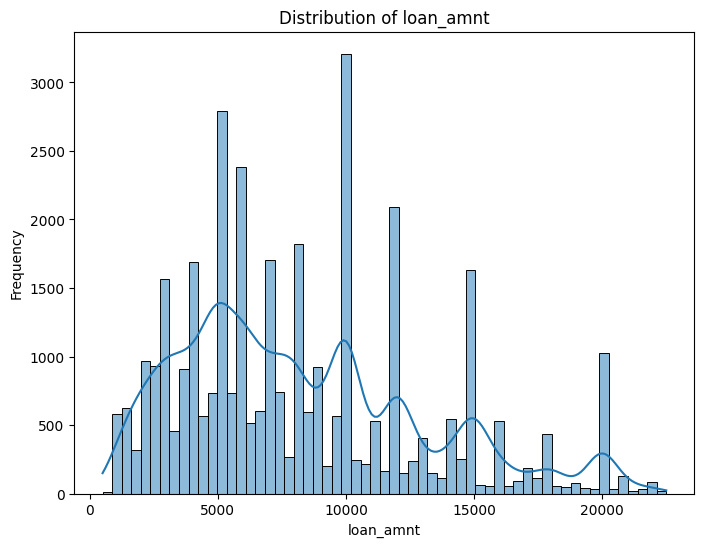

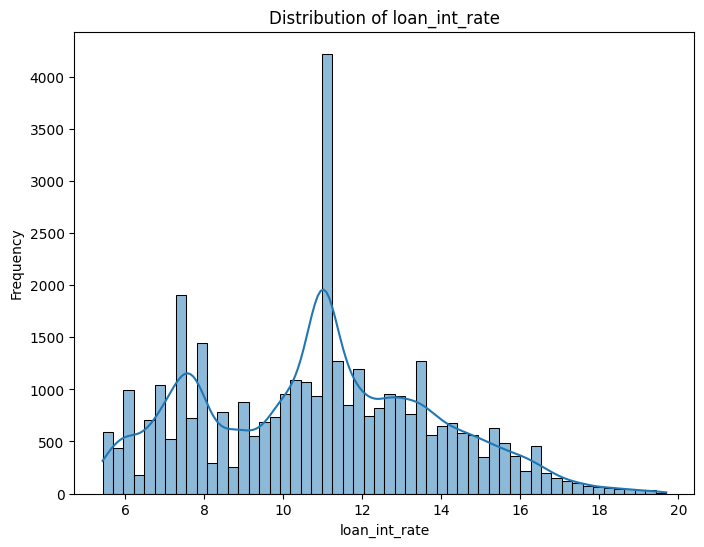

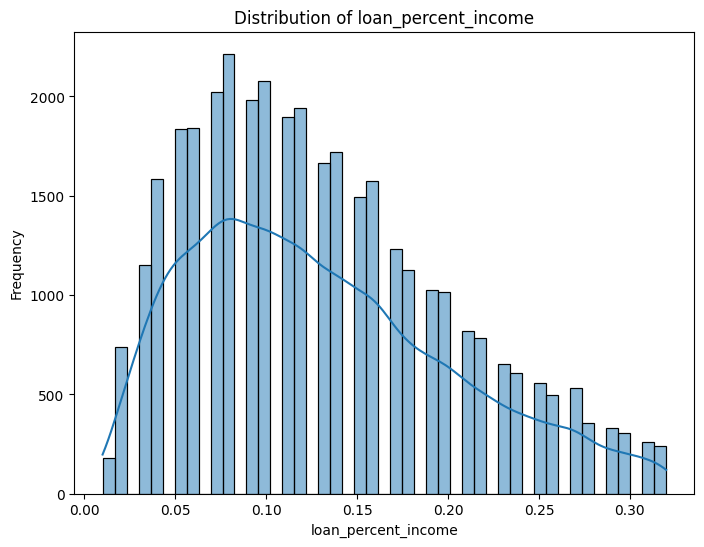

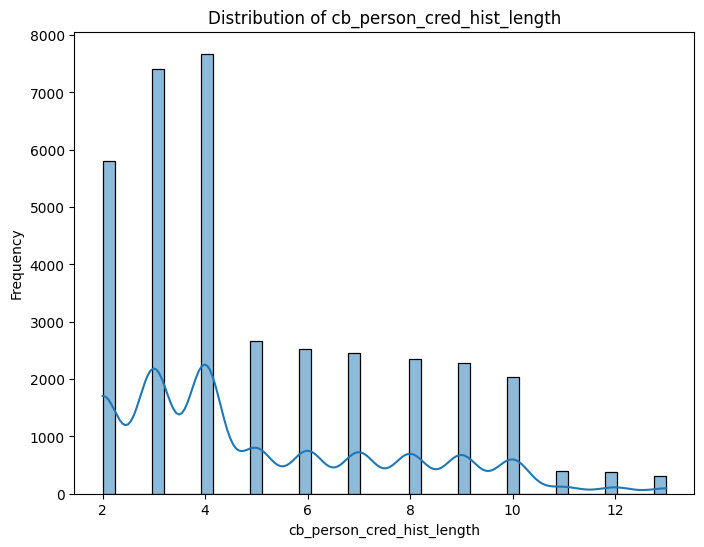

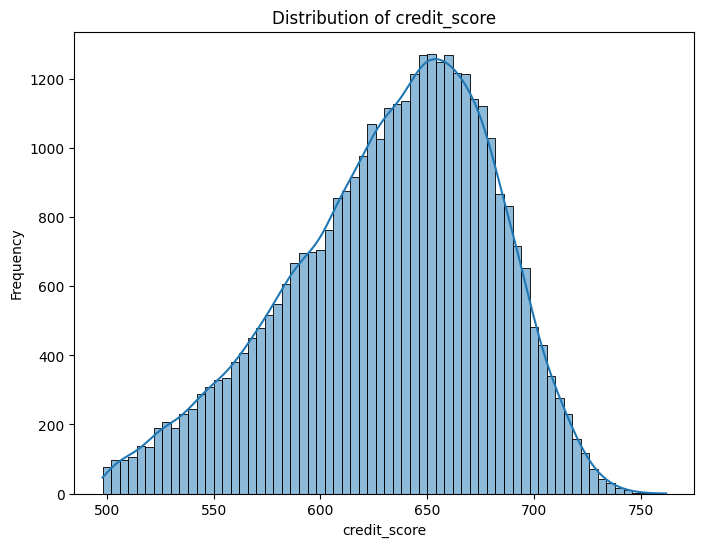

In [28]:
float_columns = df.select_dtypes(include=['float']).columns
for column in float_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Correlation Heatmap

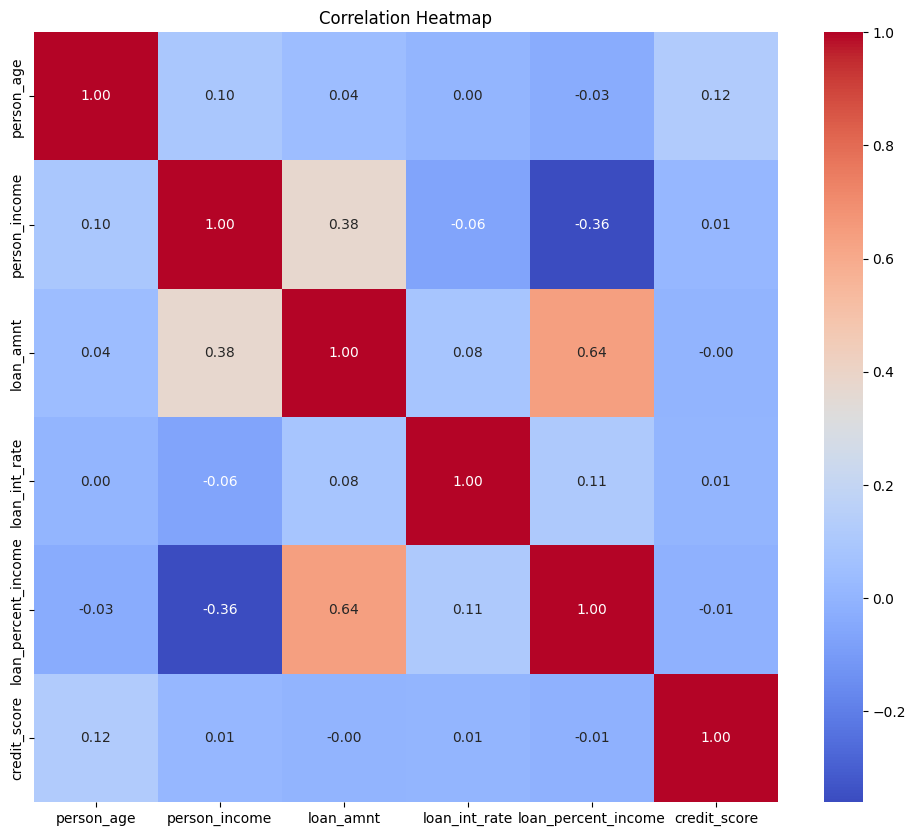

In [29]:
plt.figure(figsize=(12,10))
correlation_matrix=df[['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','credit_score']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Model Training and Evaluation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"Number of principal components selected: {pca.n_components_}")
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

Number of principal components selected: 10


In [32]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)

Logistic Regression Accuracy: 0.8907
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5774
           1       0.75      0.69      0.72      1478

    accuracy                           0.89      7252
   macro avg       0.84      0.82      0.83      7252
weighted avg       0.89      0.89      0.89      7252

--------------------------------------------------
XGBoost Accuracy: 0.9291
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5774
           1       0.87      0.77      0.82      1478

    accuracy                           0.93      7252
   macro avg       0.90      0.87      0.89      7252
weighted avg       0.93      0.93      0.93      7252

--------------------------------------------------
Random Forest Accuracy: 0.9228
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5774
           1       0.87      0.73      0.7

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [500, 1000]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Hyperparameter tuning with GridSearchCV
best_models = {}

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    print("-" * 50)

# Model evaluation on test data
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy on test data: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)


Tuning hyperparameters for Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.8889
--------------------------------------------------
Tuning hyperparameters for XGBoost...


/Users/anwinsanju/miniconda3/envs/autoloan/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:23:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anwinsanju/miniconda3/envs/autoloan/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:23:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anwinsanju/miniconda3/envs/autoloan/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:23:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anwinsanju/miniconda3/envs/autoloan/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:23:56] WARNING: /Users/runner/work/xgboost/

Best hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation accuracy for XGBoost: 0.9298
--------------------------------------------------
Tuning hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9222
--------------------------------------------------
Tuning hyperparameters for SVM...
Best hyperparameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation accuracy for SVM: 0.9062
--------------------------------------------------
Tuning hyperparameters for KNN...
Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.8969
--------------------------------------------------
Logistic Regression Accuracy on test data: 0.8897
              precision    recall  f1-score 

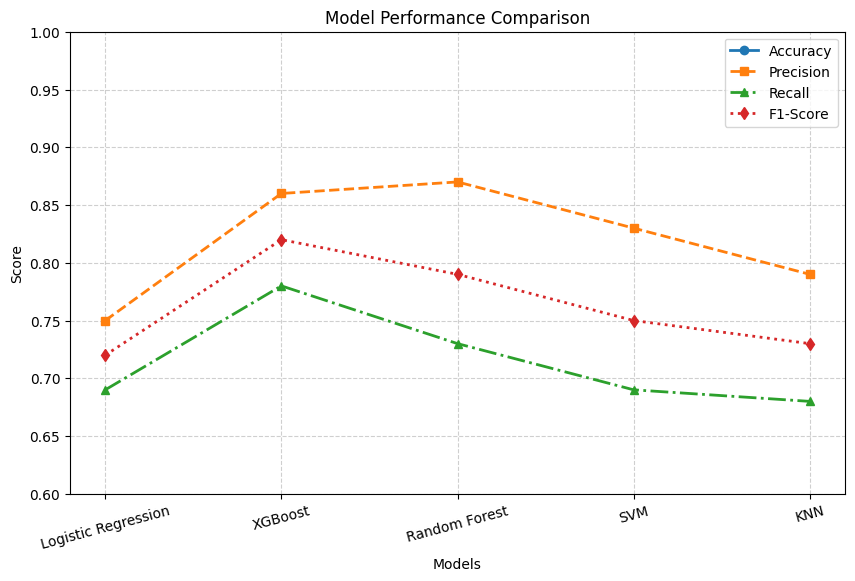

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["Logistic Regression", "XGBoost", "Random Forest", "SVM", "KNN"]

# Metrics
accuracy = [88.97, 93.02, 92.25, 90.75, 89.78]
precision = [0.75, 0.86, 0.87, 0.83, 0.79]
recall = [0.69, 0.78, 0.73, 0.69, 0.68]
f1_score = [0.72, 0.82, 0.79, 0.75, 0.73]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', label='Accuracy', linestyle='-', linewidth=2)
plt.plot(models, precision, marker='s', label='Precision', linestyle='--', linewidth=2)
plt.plot(models, recall, marker='^', label='Recall', linestyle='-.', linewidth=2)
plt.plot(models, f1_score, marker='d', label='F1-Score', linestyle=':', linewidth=2)

# Labels and Title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0.6, 1.0)  # Adjusting y-axis range for better visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.xticks(rotation=15)
plt.show()